In [1]:
import numpy as np
import os
from pathlib import Path
import igraph as ig
from matplotlib import pyplot as plt
from tqdm import tqdm
from multiprocessing.pool import ThreadPool

In [2]:
GRAPH_DATA_DIR = Path("/home/rico/Documents/thesis/eda/notebooks/sample_data/transit_graphs")

In [3]:
graph_folders = [d for d in os.listdir(GRAPH_DATA_DIR) if os.path.isdir(GRAPH_DATA_DIR.joinpath(d))]
graphs = [GRAPH_DATA_DIR.joinpath(folder).joinpath(file) for folder in graph_folders for file in os.listdir(GRAPH_DATA_DIR.joinpath(folder)) if Path(file).suffix == '.gml']
graph = graphs[0]

In [4]:
g = ig.read(graph)
g_new = ig.read(graph)

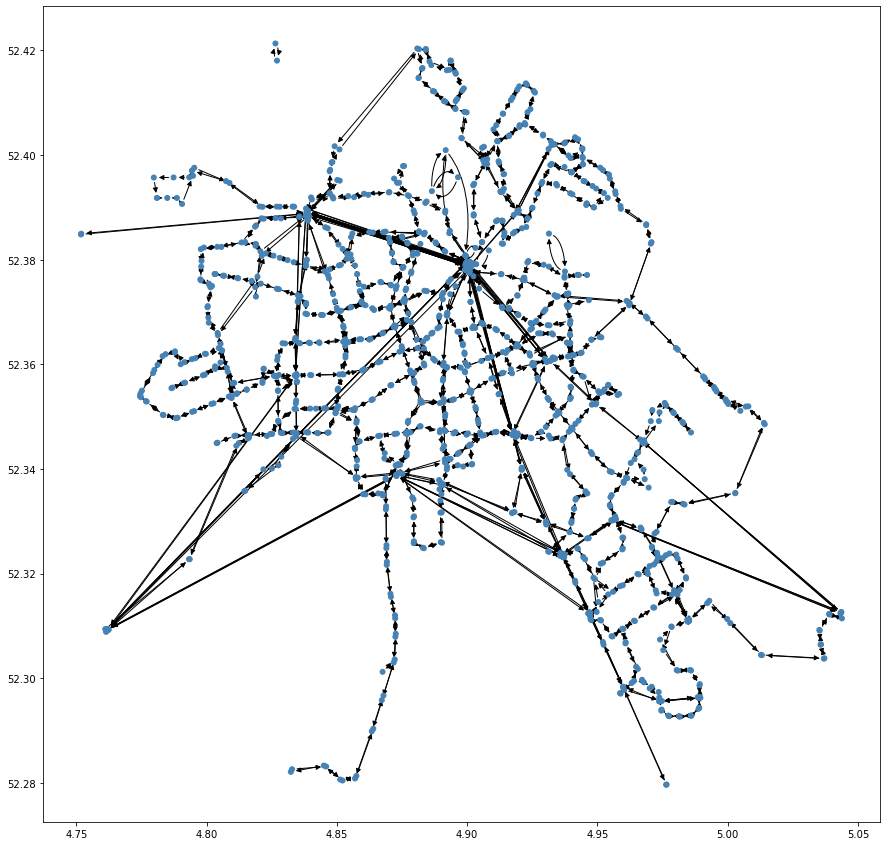

In [5]:
fig, ax = plt.subplots(figsize=(15,15))
ig.plot(g, target=ax)

In [6]:
def combine_attrs(**kwargs):
    print(kwargs)
    return None

g_stop_name_clustering = ig.clustering.VertexClustering.FromAttribute(g, "stop_name")
membership = g_stop_name_clustering.membership
# Is in-place
g_new.contract_vertices(membership, combine_attrs='max')

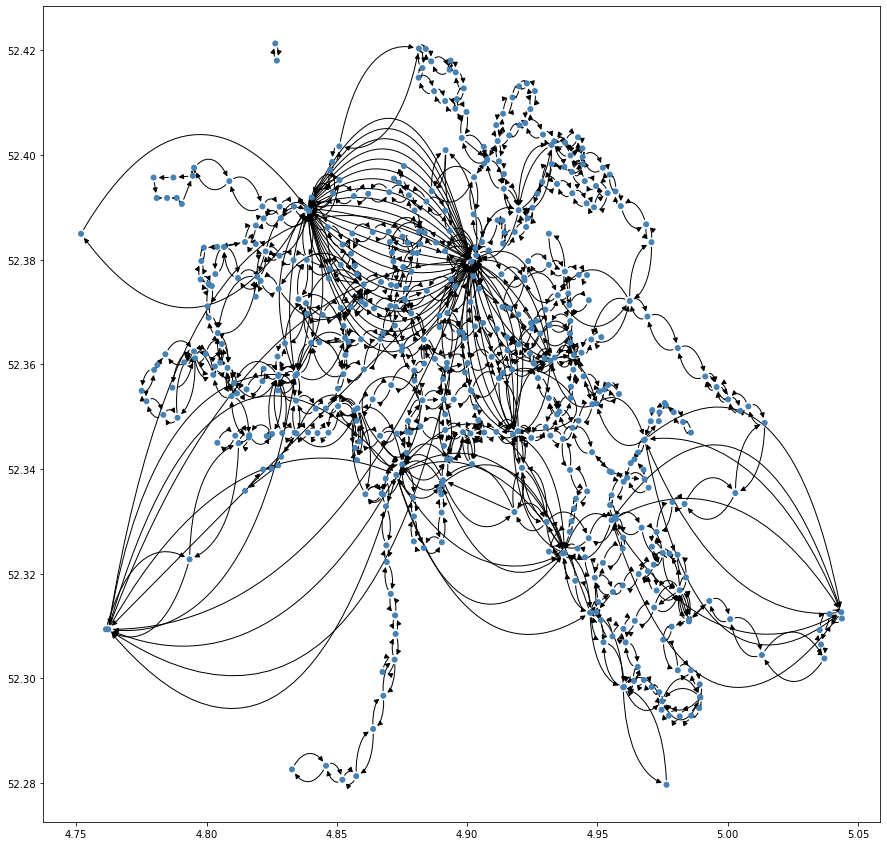

In [7]:
fig, ax = plt.subplots(figsize=(15,15))
ig.plot(g_new, target=ax)

In [8]:
# Is also in-place
g_new.simplify()

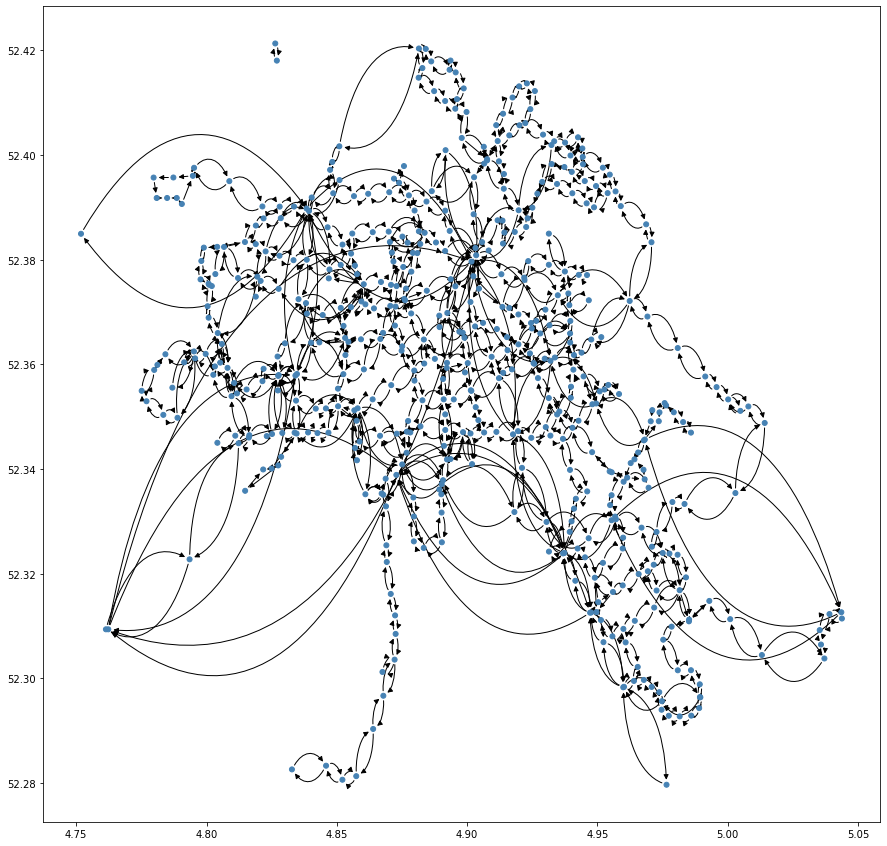

In [9]:
fig, ax = plt.subplots(figsize=(15,15))
ig.plot(g_new, target=ax)

In [10]:
print(f"With contract_vertices we reduce the graph by {len(g.vs) - len(g_new.vs)} vertices")
print(f"With simplify we reduce the graph by {len(g.es) - len(g_new.es)} vertices")

With contract_vertices we reduce the graph by 696 vertices
With simplify we reduce the graph by 157 vertices


In [17]:
def prep_graphs(path: Path):
    G = ig.load(path)
    # G_stop_name_clustering = ig.clustering.VertexClustering.FromAttribute(G, "stop_name")
    # G_membership = G_stop_name_clustering.membership
    # # Is in-place
    # G.contract_vertices(G_membership, combine_attrs='max')
    # G.simplify()
    return G

results = ThreadPool(4).map(prep_graphs, graphs)
prepared_graphs = [g for g in results]

In [12]:
graph_isomorphism = np.zeros((len(graphs), len(graphs)))

for i, graph_1 in tqdm(enumerate(prepared_graphs)):
    for j, graph_2 in enumerate(prepared_graphs):
        if i == j:
            continue
        if j < i:
            continue
        if graph_1.isomorphic_vf2(graph_2):
            graph_isomorphism[i][j] = 1

156it [00:01, 97.89it/s]


In [13]:
def get_edge_diff(g1, g2):
    es1 = set(g1.es)
    es2 = set(g2.es)
    return es1.symmetric_difference(es2)

def get_vertex_diff(g1, g2):
    vs1 = set(g1.vs)
    vs2 = set(g2.vs)
    return list(vs1.symmetric_difference(vs2))

In [14]:
prepared_graphs[0]

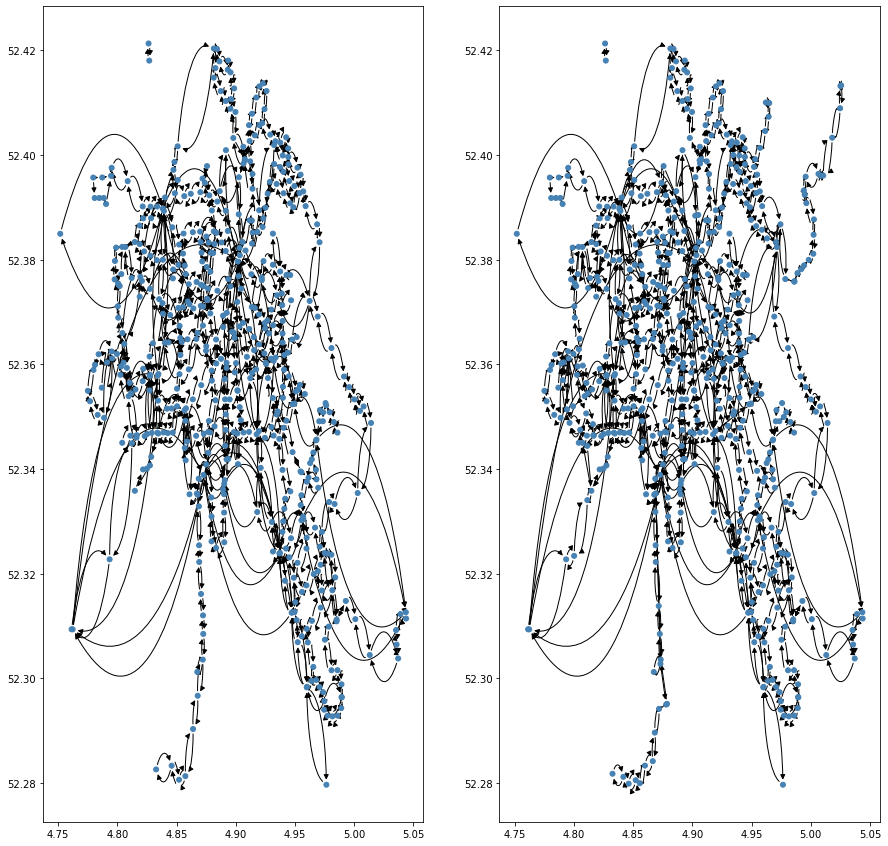

In [15]:
fig, ax = plt.subplots(1,2, figsize=(15,15))
# ax[0].imshow(graph_isomorphism)
graph_idxs = np.where(graph_isomorphism==0)[0][1], np.where(graph_isomorphism==0)[1][1]

comp_g1 = prepared_graphs[graph_idxs[0]]
comp_g2 = prepared_graphs[graph_idxs[1]]

ig.plot(comp_g1.difference(comp_g2), target=ax[0])
ig.plot(comp_g2, target=ax[1])

In [18]:
for i, g in enumerate(prepared_graphs):
    fig, ax = plt.subplots(figsize=(15,15))
    ig.plot(g, target=ax)
    fig.savefig(f'plots/gtfs_graphs/g_{i}.png')
    plt.close()

In [54]:
comp_g2.es[0].target_vertex

igraph.Vertex(<igraph.Graph object at 0x7f1f49149040>, 156, {'id': 935.0, 'label': '1523004_gvb', 'node_id': '1523004_gvb', 'x': 4.936773, 'y': 52.345782, 'unique_agency_id': 'gvb', 'route_type': 3.0, 'stop_id': '1523004', 'stop_name': 'Amsterdam, Pekelharingstraat', 'parent_station': 'stoparea:295941', 'stop_code': '00052', 'wheelchair_boarding': 1.0, 'zone_id': 'Inf', 'location_type': 0.0, 'net_type': 'transit', 'stop_frequencies': 'Inf'})

In [62]:
G1 = ig.load(graphs[0])
G2 = ig.load(graphs[1])

False

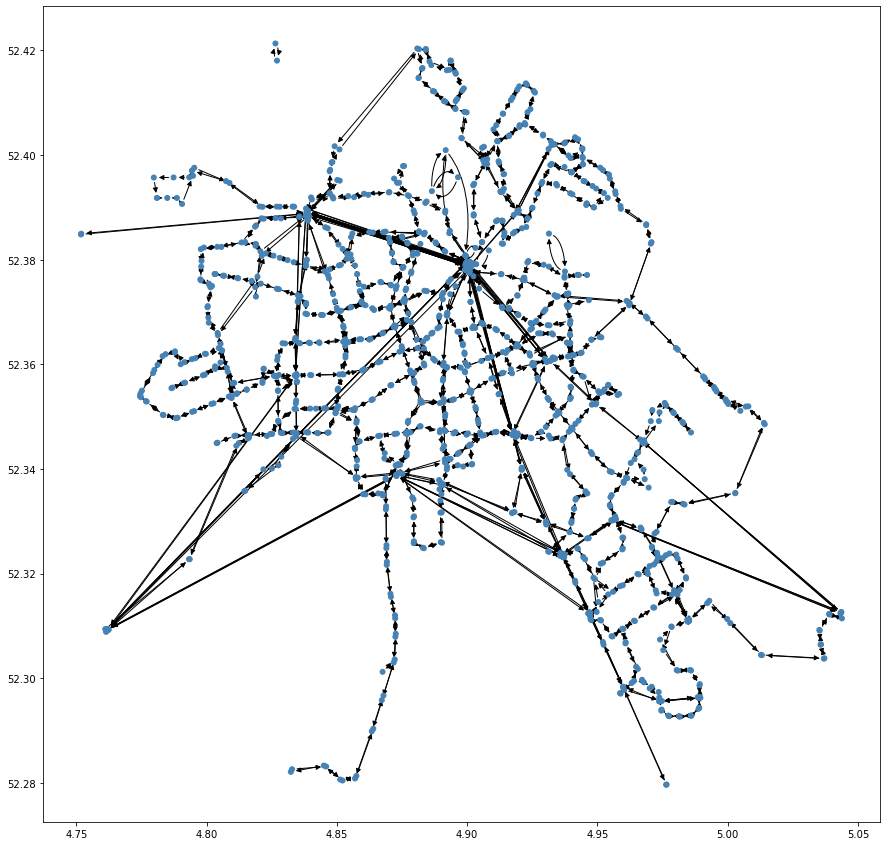

In [74]:
fig, ax = plt.subplots(figsize=(15,15))
fig.figsize = (15,15)
ig.plot(G1, target=ax)

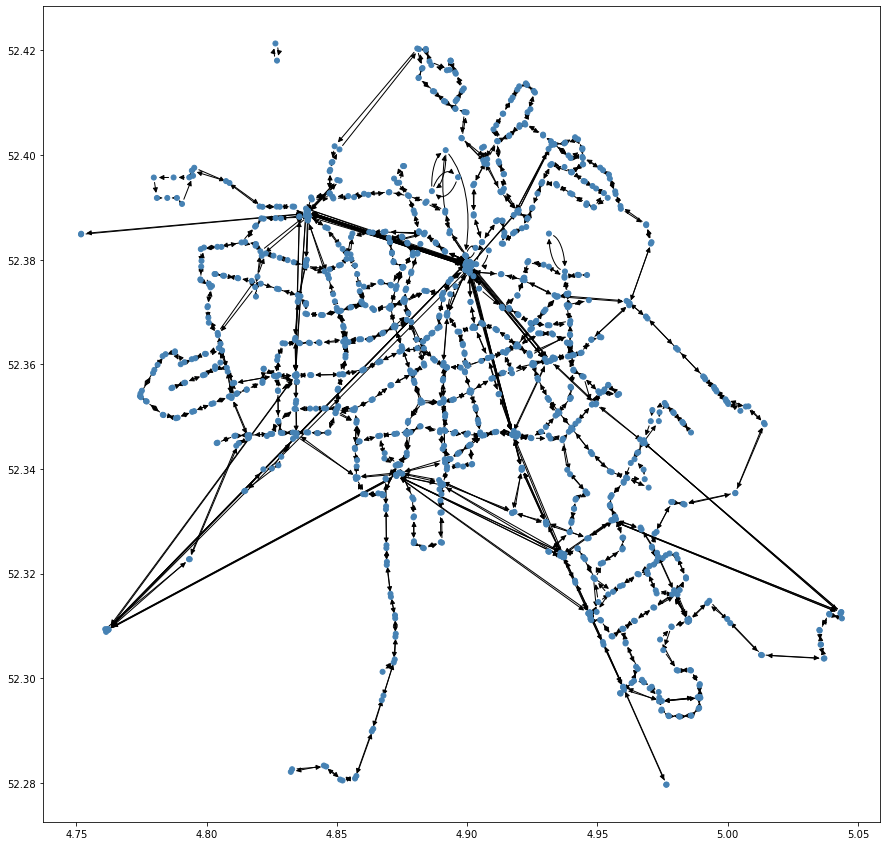

In [76]:
fig, ax = plt.subplots(figsize=(15,15))
fig.figsize = (15,15)
ig.plot(G1.simplify(combine_edges='max'), target=ax)